### Statistical Learning for Data Science 2 (229352) 
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC #fast but only linear
from sklearn.svm import SVC #slower but can do kernels

In [ ]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

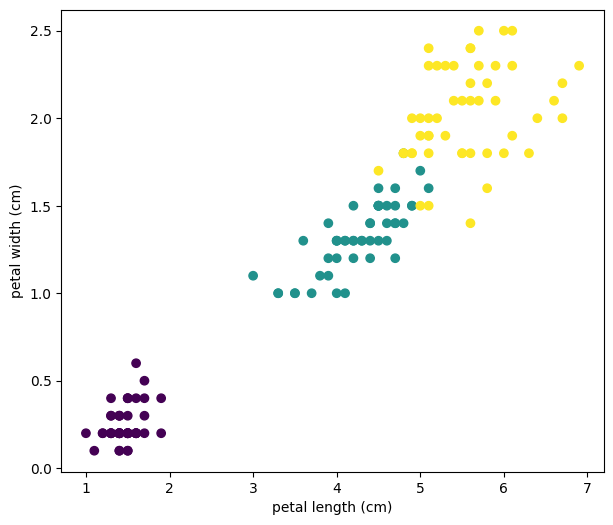

In [ ]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [ ]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### 1. Split the data into training set and test set.

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

C and Accuracy Score on test set:  0.01 ; 0.5526315789473685
C and Accuracy Score on test set:  0.1 ; 0.5526315789473685
C and Accuracy Score on test set:  1.0 ; 0.7631578947368421
C and Accuracy Score on test set:  10.0 ; 0.8947368421052632
C and Accuracy Score on test set:  100.0 ; 0.9210526315789473


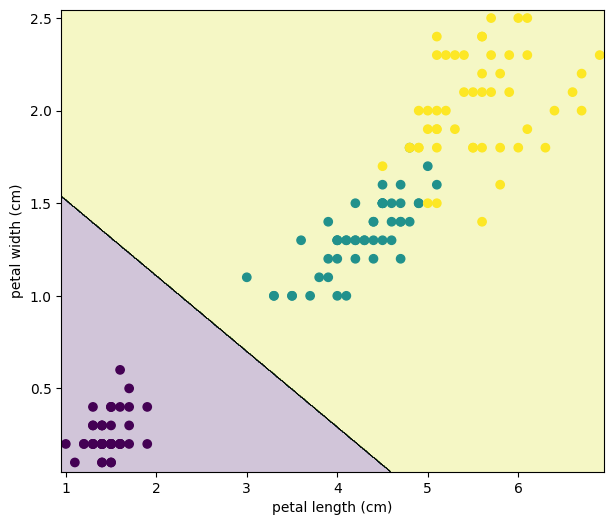

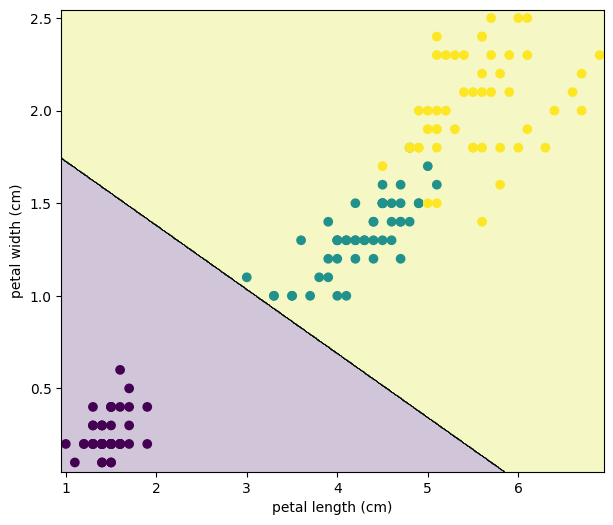

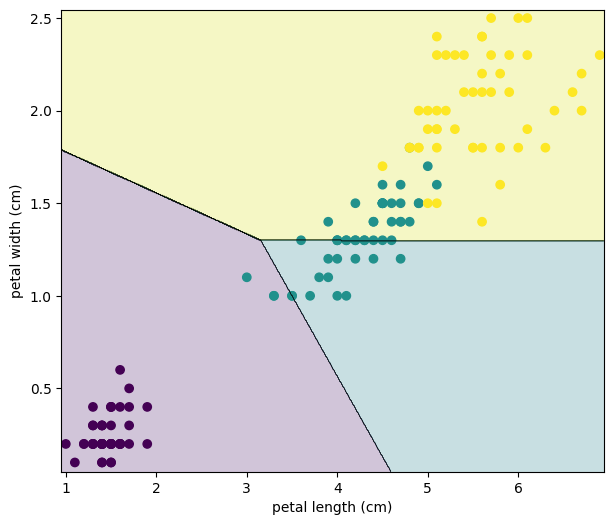

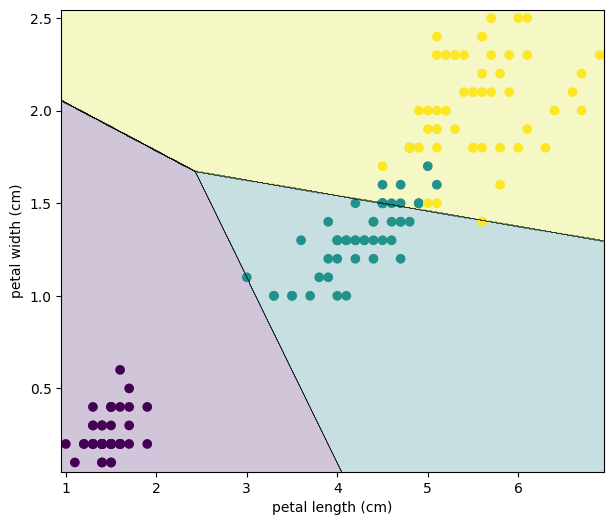

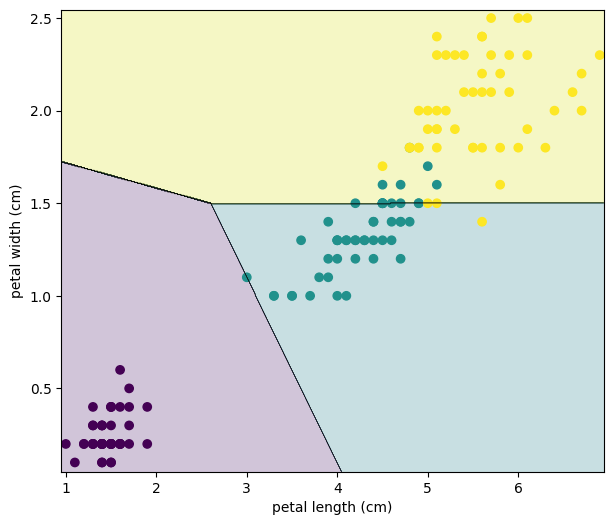

In [ ]:
for C in (0.01, 0.1, 1.0, 10.0, 100.0):
  clf = make_pipeline(LinearSVC(loss='hinge',C=C,max_iter=100000))
  clf.fit(X_train,y_train)
  plot_decision_boundary(clf,X,y)
  print('C and Accuracy Score on test set: ', C, ';',clf.score(X_test,y_test))

Answer: C มีผลต่อความชันและลักษณะของเส้น decision boundery

#### 3. Pick a value of `C` that you like. Then report the test error.

In [ ]:
clf = make_pipeline(LinearSVC(loss='hinge',C=100.0,max_iter=100000))
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.94      0.88      0.91        17
           2       0.88      0.93      0.90        15

    accuracy                           0.92        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.92      0.92      0.92        38



In [ ]:
# test error = 1- test accuracy
print('test error :', 1-clf.score(X_test,y_test))

test error : 0.07894736842105265


#### 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

gamma and Accuracy Score on test set:  0.01 ; 0.9736842105263158
gamma and Accuracy Score on test set:  0.1 ; 0.9473684210526315
gamma and Accuracy Score on test set:  1.0 ; 0.9736842105263158
gamma and Accuracy Score on test set:  10.0 ; 0.9736842105263158
gamma and Accuracy Score on test set:  100.0 ; 0.8421052631578947


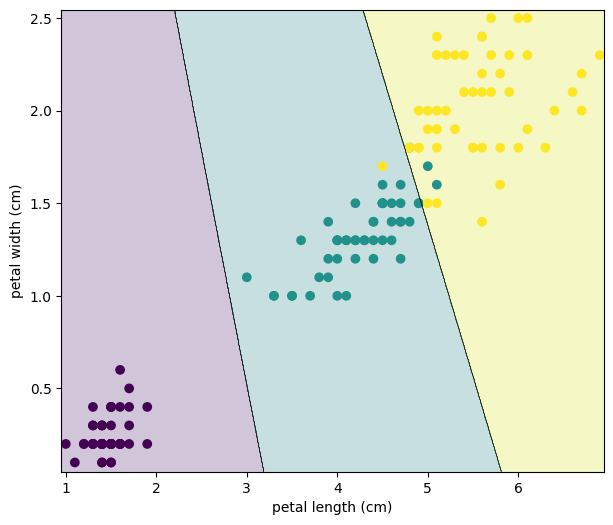

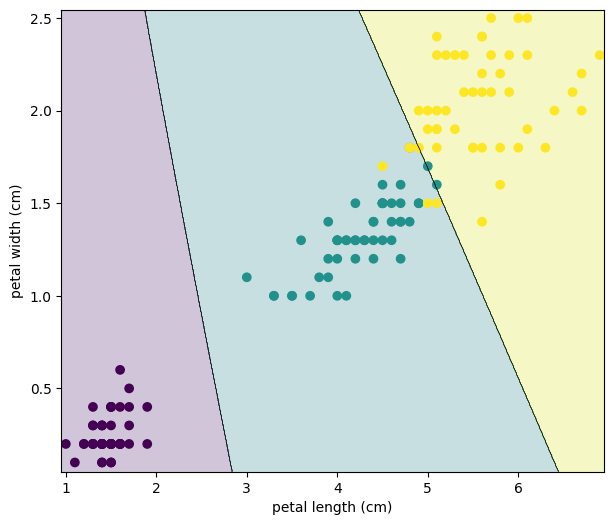

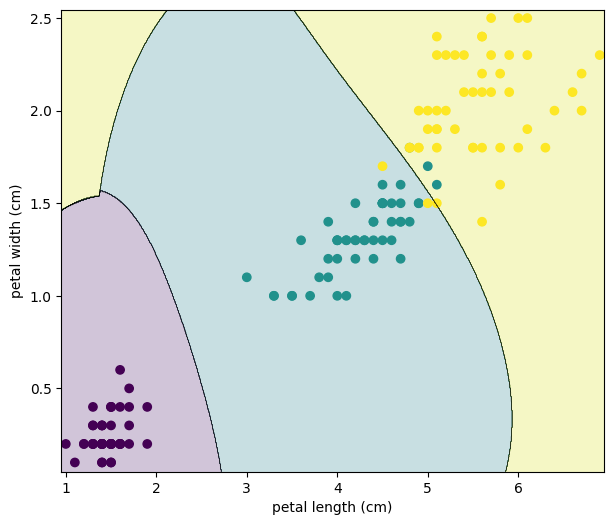

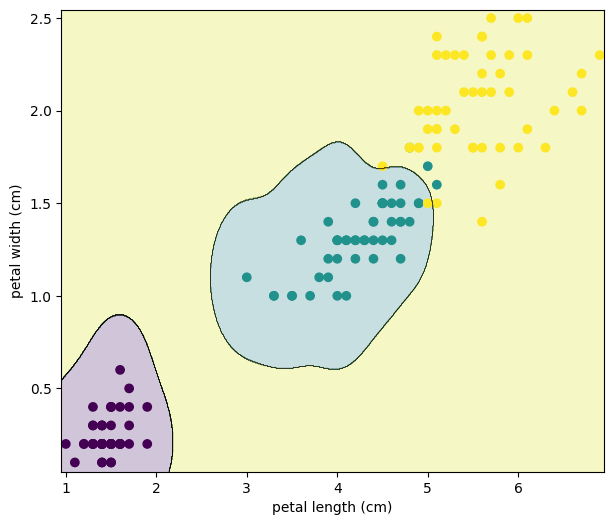

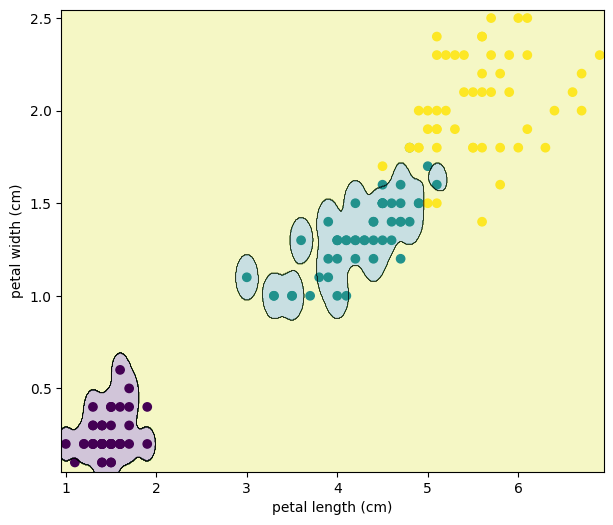

In [ ]:
from sklearn.preprocessing import StandardScaler
for g in (0.01, 0.1, 1.0, 10.0, 100.0):
  # clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
  clf = make_pipeline(SVC(kernel='rbf',C= 1.0,gamma= g,max_iter=100000))
  clf.fit(X_train,y_train)
  plot_decision_boundary(clf,X,y)
  print('gamma and Accuracy Score on test set: ', g, ';',clf.score(X_test,y_test))

Answer: gamma มีผลต่อความโค้งของ decision boundary ซึ่งส่งผลต่อความครอบคลุมกลุ่มข้อมูล

#### 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [ ]:
clf = make_pipeline(SVC(kernel='rbf',C= 1.0,gamma= 0.01,max_iter=100000))
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.94      1.00      0.97        16
           2       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
svm = SVC(kernel='rbf',C= 1.0,gamma= 0.01,max_iter=100000)
svm.fit(X_train, y_train)

a = svm.support_

In [ ]:
print('test error and the number of support vectors is', 1-clf.score(X_test,y_test), ', ', a)

test error and the number of support vectors is 0.02631578947368418 ,  [  5  29  31  38  50  51  57  63  71  82  85  96 103 105 106   3  13  15
  18  20  22  26  32  35  37  42  43  58  59  60  62  65  67  70  74  81
  86  87  89  91  92  94  95  99 104 107 108 110   0   1   7  10  11  14
  16  17  19  23  27  30  33  34  39  44  47  48  49  52  55  56  61  64
  66  68  75  88 101]


#### 6. ระหว่าง Linear SVM กับ Kernel SVM คุณคิดว่าโมเดลไหนที่เหมาะสมกับการแบ่งกลุ่มข้อมูลชุดนี้มากกว่ากัน สามารถใช้ test accuracy หรือ decison boundary plot ในการอธิบาย

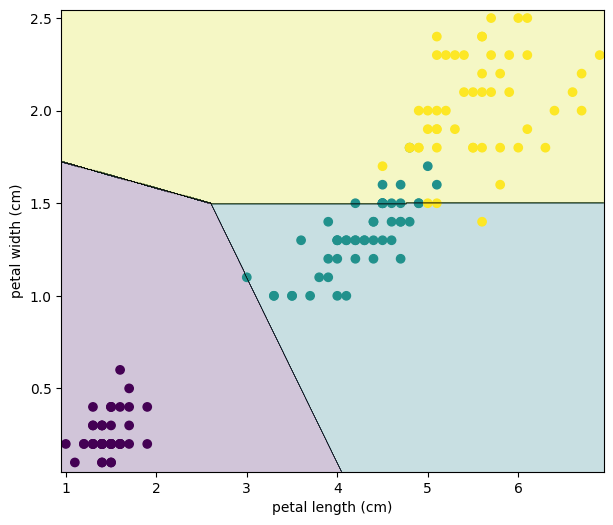

In [ ]:
# linear SVM
clf_lin = make_pipeline(LinearSVC(loss='hinge',C=100.0,max_iter=100000))
clf_lin.fit(X_train,y_train)
plot_decision_boundary(clf_lin,X,y)

In [ ]:
y_pred_l = clf_lin.predict(X_test)
print(classification_report(y_pred_l,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.82      0.93      0.87        15
           2       0.93      0.82      0.87        17

    accuracy                           0.89        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.90      0.89      0.89        38



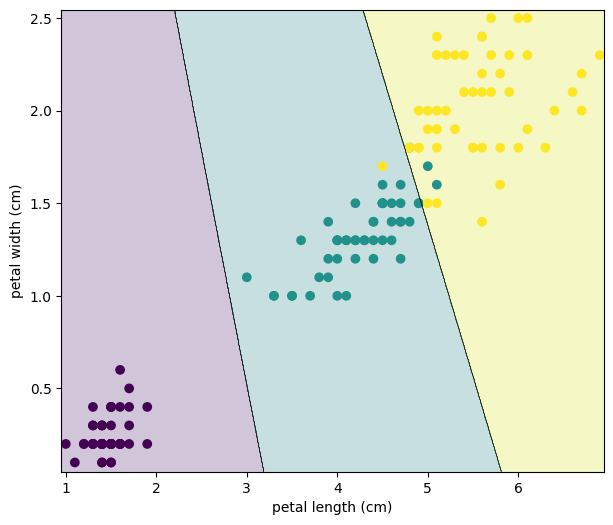

In [ ]:
# kernel SVM
clf_k = make_pipeline(SVC(kernel='rbf',C= 1.0,gamma= 0.01,max_iter=100000))
clf_k.fit(X_train,y_train)
plot_decision_boundary(clf_k,X,y)

In [ ]:
y_pred_k = clf_k.predict(X_test)
print(classification_report(y_pred_k,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.94      1.00      0.97        16
           2       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



Answer: เลือกใช้ `kernel SVM` เนื่องจาก accuracy สูงกว่า `liner SVM` และพิจารณาจาก dicision boundery plot `kernel SVM` มีการแบ่งกลุ่มที่ดีกว่า